In [5]:

# Import the necessary packages
import numpy as np
import cv2
import glob
import os
import tqdm

def adjust_gamma(image, gamma=2.2):
    
    # Build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
    table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Apply gamma correction using the lookup table
    gamma_corrected = cv2.LUT(image, table)

    return gamma_corrected

# adjust gamma for a folder of images

def adjust_gamma_folder(folder, gamma=2.2):
    # get all the files in the folder
    files = glob.glob(folder + '/*jpg')
    # iterate over the files
    for file in tqdm.tqdm(files):
        # read the image
        img = cv2.imread(file)
        # apply gamma correction
        gamma_corrected = adjust_gamma(img, gamma)
        # get the original file name
        file_name = os.path.basename(file)
        # add 'gamma' to the file name
        new_file_name = file_name+ '_gamma.jpg'
        # save the image with the new file name
        folder_to_save = os.path.join(folder, 'gamma')   
        if not os.path.exists(folder_to_save):
            os.makedirs(folder_to_save)
        cv2.imwrite(os.path.join(folder_to_save, new_file_name), gamma_corrected)
folder_path ='C:/Users/gbo10/OneDrive/measurement_paper_images/splitted videos/car/7.4.2024/90 lux'
adjust_gamma_folder(folder_path, 2.2)


100%|██████████| 214/214 [02:29<00:00,  1.43it/s]


In [8]:
import numpy as np
import cv2

def adjust_gamma(image_path, gamma=2.2):
    # Read the image from the given path
    image = cv2.imread(image_path)
    
    # Check if the image was successfully read
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")
    
    # Build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
    table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Apply gamma correction using the lookup table
    gamma_corrected = cv2.LUT(image, table)

    return gamma_corrected

# Path to the image file
image_path = "C:/Users/gbo10/OneDrive/measurement_paper_images/check color.jpg"

# Apply gamma correction
gamma_corrected = adjust_gamma(image_path,2.2)

#save the image
cv2.imwrite("C:/Users/gbo10/OneDrive/measurement_paper_images/check color_gamma.jpg", gamma_corrected)


True

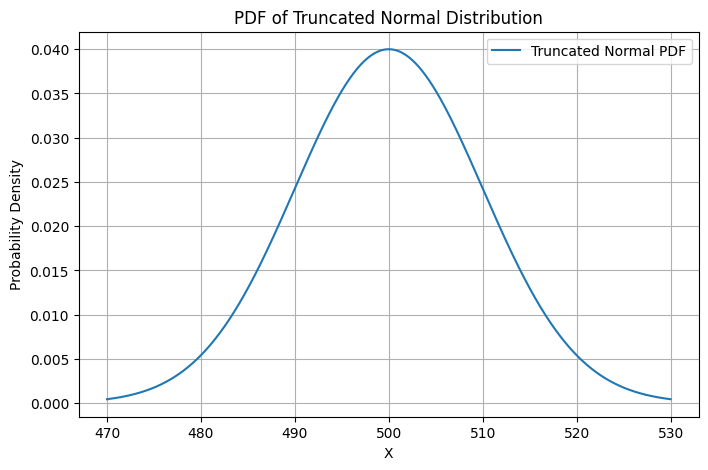

In [2]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

# Parameters
mu = 500
sigma = 10
a = 470
b = 530

# Truncation points in terms of Z-scores
a_scaled = (a - mu) / sigma
b_scaled = (b - mu) / sigma

# Create a truncated normal distribution object
truncated_normal = truncnorm(a=a_scaled, b=b_scaled, loc=mu, scale=sigma)

# Generate points for plotting
x = np.linspace(a, b, 1000)
pdf_values = truncated_normal.pdf(x)

# Plotting the PDF
plt.figure(figsize=(8, 5))
plt.plot(x, pdf_values, label='Truncated Normal PDF')
plt.title('PDF of Truncated Normal Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
from brisque import BRISQUE
import numpy as np
from PIL import Image

img_path = "C:/Users/gbo10/OneDrive/pictures/splitted videos/10.4.2024/gamma/GX010161_659_659.jpg_gamma.jpg"
img = Image.open(img_path)
ndarray = np.asarray(img)

obj = BRISQUE(url=False)
obj.score(img=ndarray)

54.641713143338364

In [ ]:
C:\Users\gbo10\OneDrive\pictures\splitted videos\10.4.2024\gamma\GX010161_629_629.jpg_gamma.jpg

In [ ]:
GX010161_623_623.jpg_gamma.jpg

In [10]:
#blur score
import cv2
import numpy as np

def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

image = cv2.imread("C:/Users/gbo10/OneDrive/pictures/splitted videos/10.4.2024/gamma/GX010161_629_629.jpg_gamma.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fm = variance_of_laplacian(gray)
print(fm)


28.383105045522182


In [ ]:
GX010161_623_623.jpg_gamma.jpg

GX010161_629_629.jpg_gamma.jpg

GX010161_659_659.jpg_gamma.jpg

In [20]:
import cv2

# Load the image

import cv2 as cv
import numpy as np

img = cv2.imread('C:/Users/gbo10/OneDrive/pictures/splitted videos/10.4.2024/gamma/GX010161_659_659.jpg_gamma.jpg', cv2.IMREAD_GRAYSCALE)
laplacian = cv.Laplacian(img,cv.CV_64F)
gnorm = np.sqrt(laplacian**2)
sharpness = np.average(gnorm)

print(sharpness)

3.950857710460315


In [26]:
import cv2
from cv.quality import QualityBRISQUE

# Path to the trained model file
model_path = 'path_to_model_file/brisque_model_live.yml'

# Create a BRISQUE object
brisque = QualityBRISQUE.create(model_path)

img = cv2.imread('C:/Users/gbo10/OneDrive/pictures/splitted videos/10.4.2024/gamma/GX010161_659_659.jpg_gamma.jpg')

# Compute the BRISQUE score
score = brisque.compute(img)

print(score)

ModuleNotFoundError: No module named 'cv'

In [29]:
import cv2
# read image
img = cv2.imread('C:/Users/gbo10/OneDrive/pictures/splitted videos/10.4.2024/gamma/GX010161_623_623.jpg_gamma.jpg
',1)
# compute brisque quality score via static method
score = cv2.quality.QualityBRISQUE_compute(img, model_path,range_path) # specify model_path and range_path
# compute brisque quality score via instance
# specify model_path and range_path
obj = cv2.quality.QualityBRISQUE_create(model_path, range_path)
score = obj.compute(img)

AttributeError: module 'cv2.quality' has no attribute 'QualityBRISQUE_compute'

In [35]:
# blur Fast Fourier Transform (FFT)
import cv2
import numpy as np

def fft_blur_score(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return np.sum(magnitude_spectrum)

image = cv2.imread("C:/Users/gbo10/OneDrive/pictures/splitted videos/10.4.2024/gamma/GX010161_629_629.jpg_gamma.jpg", cv2.IMREAD_GRAYSCALE)

fm = fft_blur_score(image)
print(fm)


2679691956.914469


In [39]:
#Tenengrad 
import cv2
import numpy as np

def tenengrad(image, ksize=3):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)
    return np.sum(sobelx**2 + sobely**2)

image = cv2.imread("C:/Users/gbo10/OneDrive/pictures/splitted videos/10.4.2024/gamma/GX010161_659_659.jpg_gamma.jpg", cv2.IMREAD_GRAYSCALE)

fm = tenengrad(image)
print(fm)




12653589640.0
